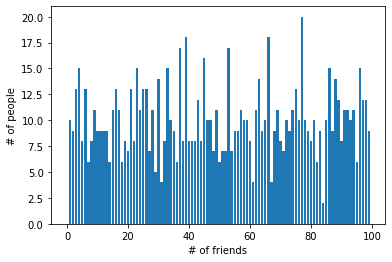

In [13]:
# chapter five --> statistics
import random
from collections import Counter
import matplotlib.pyplot as plt
from typing import List

# this list will serve as the "number of friends" per user that we can perform stats on
num_friends = [random.randint(1,100) for _ in range(1000)]


# generate a bar chart that represents the number of people that have "x" # of friends
friend_counts = Counter(num_friends)
xs = range(max(num_friends))
ys = [friend_counts[x] for x in xs]
plt.bar(xs,ys)
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()


In [12]:
# central tendancies
# ------------------

# write a f(x) to get the mean of the number of friends
def mean(xs:List[float]) -> float:
    return sum(xs)/len(xs)

assert mean([1,2,3]) == 2


# write a f(x) to get the median of the number of friends
# if the # of elements is odd, then median == List[len(List) // 2]
# if the # of elements is even, the median == List[len(List) // 2 - 1] + List[len(List) // 2] / 2
def median(xs:List[float]) -> float:
    num_items = len(xs)
    is_even = True if num_items % 2 == 0 else False
    sorted_xs = sorted(xs)
    return sorted_xs[num_items // 2] if not is_even else mean([sorted_xs[num_items // 2 - 1],sorted_xs[num_items // 2]])

assert median([2,1,5,3,4]) == 3
assert median([3,2,1,4,5,6]) == 3.5
assert median([1,9,2,10]) == (2 + 9) / 2

print(f"mean number of friends: {mean(num_friends)}")
print(f"median number of friends: {median(num_friends)}")

mean number of friends: 50.064
median number of friends: 49.0


In [11]:
# outliers can be damaging to the integrity of the mean of our dataset
#  write a f(x) that returns the pth-percentile in a list of values xs (quantile)

def quantile(xs: List[float], p: float) -> float:
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

print(f"10% of users have <= {quantile(num_friends, 0.10)} friends")
print(f"25% of users have <= {quantile(num_friends, 0.25)} friends")
print(f"75% of users have <= {quantile(num_friends, 0.75)} friends")
print(f"90% of users have <= {quantile(num_friends, 0.90)} friends")

10% of users have <= 9 friends
25% of users have <= 25 friends
75% of users have <= 76 friends
90% of users have <= 91 friends


In [10]:
#  sometimes you may also want to look at the mode (most common) value of the dataset
#  write a f(x) to accomplish this

def mode(xs: List[float]) -> List[float]:
    # if the number 7 occurs 3 times, the data from counter looks like {..., 7: 3}
    counts = Counter(xs)
    
    # we want to return the value that has the most counts in max_occurences
    max_occurences = max(counts.values())
    
    # sometimes, there may be more than a single mode if 2+ values both occur the max # of times     
    return [x for x, count in counts.items() if count == max_occurences]
    
assert mode([1,1,1,3,3,3,2,2]) == [1,3]
print(mode(num_friends))

[9]


In [9]:
# dispersion refers to how spread out our data is
#  values close to 0 --> data is not spread
#  large values --> data is very spread out
#  write a function to return the range of a dataset

def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range([1,5,2,3,9,12,4,2]) == 11
print(data_range(num_friends))

99


In [26]:
# a better way to get an idea of the dispersion of a dataset is to take a look at the variance
from ipynb.fs.full.chapter_four import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean so the result has mean 0"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs:List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"
    
    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)
    
print(variance(num_friends))  # units of the return will be friends^2

843.7902662662666


In [43]:
# the units of variance are slightly non-intuitive, instead we look at standard deviation
import math

def standard_deviation(xs: List[float]) -> float:
    return math.sqrt(variance(xs))

print(standard_deviation(num_friends))

29.048068201969414


In [39]:
# the issue with range and stdev is that they are affected heavily by outlier data
# a more robust solution is to use the IQR betwewn 75th and 25th percentile
def interquartile(xs:List[float]) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile([1,2,3,4,5,6,7,8,9,10]) == 5
print(interquartile(num_friends))



51


In [53]:
# covariance and correlation
from ipynb.fs.full.chapter_four import dot


# covariance measures how two variables vary in tandem from their means
def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys) # both lists must be same size to compare
    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1) 

def correlation(xs: List[float], ys: List[float]) -> float:
    """result must be between -1 and 1
    -1 being perfect anticorrelation
    +1 being perfect correlation"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs,ys) / stdev_x / stdev_y
    else:
        return 0    # if there is no variation, then the correlation is 0